# AdaBoost Regression with scikit-learn
_A comprehensive tutorial using the California Housing dataset_

Author: Shrey Nayak

---

## Objectives
- Understand **AdaBoost Regression** theory.
- Implement `AdaBoostRegressor` in scikit-learn.
- Compare performance with Decision Tree and Random Forest.
- Interpret feature importances.
- Perform hyperparameter tuning.


## 1. Introduction to AdaBoost Regression

**AdaBoost** (Adaptive Boosting) is an **ensemble learning method** that combines multiple weak learners (usually shallow decision trees) to form a strong learner.

---

### How AdaBoost Works (Regression version)
1. **Initialize**: All training samples are given equal weight.
2. **Iterative Training**:
   - Train a weak learner (e.g., Decision Tree Regressor) on weighted data.
   - Compute the model's error.
   - Assign higher weights to poorly predicted samples so the next learner focuses on them.
3. **Final Prediction**: Combine all weak learners' predictions with weighted averaging.

---

### Key Idea
- Each new model focuses on **correcting the mistakes** of the previous ones.
- Works well when base learners are simple and prone to underfitting.

---

### Advantages
- Simple and effective.
- Works well with small and medium-sized datasets.
- Can reduce bias significantly.

### Disadvantages
- Sensitive to noisy data and outliers.
- May overfit if the base learner is too complex.
- Slower to train compared to a single tree.

---

## 2. `AdaBoostRegressor` in scikit-learn

Key parameters:
- `base_estimator`: The weak learner (default: DecisionTreeRegressor(max_depth=3)).
- `n_estimators`: Number of weak learners.
- `learning_rate`: Shrinks the contribution of each learner.
- `loss`: Loss function to optimize (`linear`, `square`, or `exponential`).

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load California Housing dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Show first rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Dataset shape: (20640, 9)

Summary statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532 

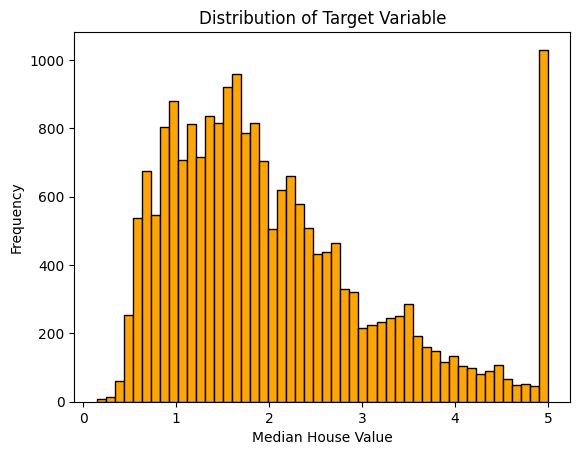

In [3]:
print("Dataset shape:", df.shape)
print("\nSummary statistics:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())

# Target variable distribution
plt.hist(df['MedHouseVal'], bins=50, color='orange', edgecolor='black')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Target Variable")
plt.show()


In [4]:
# Features and target
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling (optional for trees, included for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Initialize AdaBoost with Decision Tree as base learner
base_tree = DecisionTreeRegressor(max_depth=4, random_state=42)

adaboost = AdaBoostRegressor(
    estimator=base_tree,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Train model
adaboost.fit(X_train_scaled, y_train)

# Predictions
y_pred_ada = adaboost.predict(X_test_scaled)

# Evaluation
rmse_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
r2_ada = r2_score(y_test, y_pred_ada)

print(f"AdaBoost RMSE: {rmse_ada:.3f}")
print(f"AdaBoost R²: {r2_ada:.3f}")


AdaBoost RMSE: 0.694
AdaBoost R²: 0.632


In [6]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Decision Tree -> RMSE: {rmse_dt:.3f}, R²: {r2_dt:.3f}")
print(f"Random Forest -> RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}")
print(f"AdaBoost      -> RMSE: {rmse_ada:.3f}, R²: {r2_ada:.3f}")


Decision Tree -> RMSE: 0.706, R²: 0.620
Random Forest -> RMSE: 0.506, R²: 0.805
AdaBoost      -> RMSE: 0.694, R²: 0.632


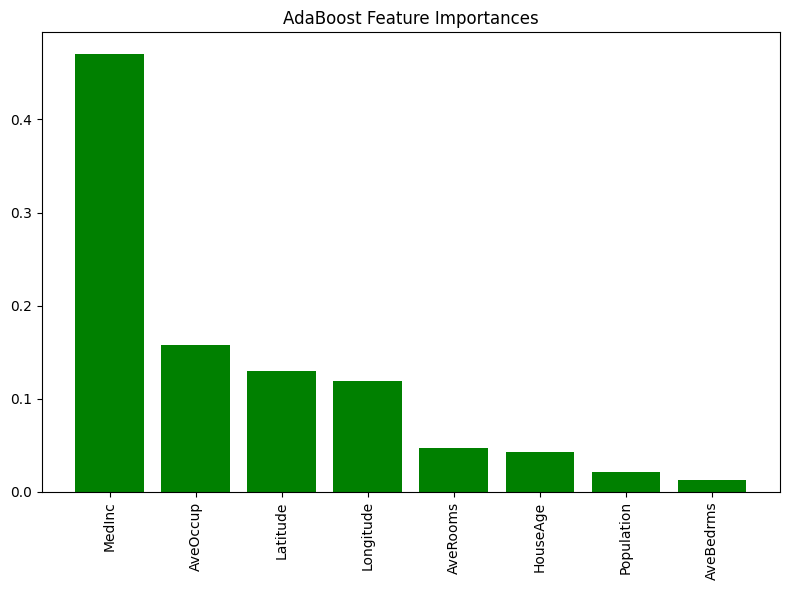

In [7]:
# Feature importance from AdaBoost
importances = adaboost.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(8,6))
plt.title("AdaBoost Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color='green', align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [8]:
# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'estimator__max_depth': [2, 4, 6]
}

# Grid Search
grid_search = GridSearchCV(
    AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42),
    param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV R²:", grid_search.best_score_)


Best Parameters: {'estimator__max_depth': 6, 'learning_rate': 0.05, 'n_estimators': 200}
Best CV R²: 0.7262764290911085


## Conclusion

- AdaBoost Regression can improve accuracy over a single decision tree by focusing on difficult-to-predict samples.
- Compared to Random Forest, performance varies depending on dataset characteristics.
- Feature importance can still be interpreted, but boosting tends to distribute importance differently than bagging.

**Advantages:**
- Can significantly reduce bias.
- Works well with weak base learners.
- Flexible — supports different base estimators.

**Limitations:**
- Sensitive to outliers.
- Can overfit if base learners are too complex.
- Slower to train than a single tree.

**Next Steps:**
- Try different base estimators.
- Compare AdaBoost with Gradient Boosting, XGBoost, and LightGBM.
